In [1]:
#link to tutorial: https://www.datacamp.com/tutorial/pytorch-cnn-tutorial

In [3]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import optim
from torch import nn
from torch.utils.data import DataLoader
from tqdm import tqdm

import torchvision
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
!pip install torchmetrics
import torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 15.9 MB/s eta 0:00:00


In [28]:
# load and pre-process the data into a tensor
batch_size = 60
train_dataset = datasets.MNIST(root="dataset/", download=True, train=True, transform=transforms.ToTensor())
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.MNIST(root="dataset/", download=True, train=False, transform=transforms.ToTensor())
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

print("Training dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))
print("Number of batches in training loader:", len(train_loader))
print("Number of batches in test loader:", len(test_loader))

# Get a sample batch and print its shape
train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))
print("Shape of a training batch (images):", train_images.shape)
print("Shape of a training batch (labels):", train_labels.shape)
print("Shape of a test batch (images):", test_images.shape)
print("Shape of a test batch (labels):", test_labels.shape)

Training dataset size: 60000
Test dataset size: 10000
Number of batches in training loader: 1000
Number of batches in test loader: 167
Shape of a training batch (images): torch.Size([60, 1, 28, 28])
Shape of a training batch (labels): torch.Size([60])
Shape of a test batch (images): torch.Size([60, 1, 28, 28])
Shape of a test batch (labels): torch.Size([60])


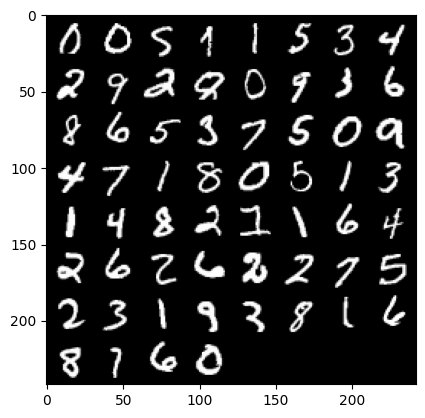

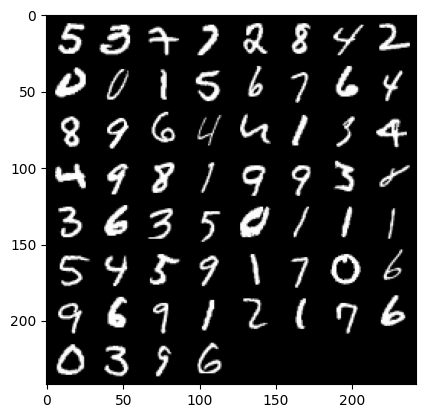

In [29]:
# view the data
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
labels
# show images
imshow(torchvision.utils.make_grid(images))

# Get another random batch of training images and show them
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

In [13]:
# defining the cnn architecture
class CNN(nn.Module):
  def __init__(self, in_channels, num_classes):
    #building blocks of cnn
    #parameters:
      # in_channels: number of channels in the input image (for gray scale images, 1)
      # num_classes: number of classes to predict. in our problem 10(i.e. digits from 0 to 9)

    super(CNN, self).__init__()

    # 1st convolutional layer
    self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=8, kernel_size=3, padding=1)
    # max pooling layer
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    # 2nd convolutional layer
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
    # fully connected layer
    self.fc1 = nn.Linear(16 * 7 * 7, num_classes)

  def forward(self, x):

    # define the forward pass of the neural network
    # parameters:
        #x: input tensor
    # returns:
      # torch.Tensor
       # the output tensor after passing through the network

    x = F.relu(self.conv1(x)) # apply first convolution and ReLU activation
    x = self.pool(x) # apply max pooling
    x = F.relu(self.conv2(x)) # apply second convolution and ReLU activation
    x = self.pool(x) # apply max pooling
    x = x.reshape(x.shape[0], -1) # flatten the tensor
    x = self.fc1(x) # apply fully connected layer
    return x

In [19]:
# define the loss function
criterion = nn.CrossEntropyLoss()

In [20]:
# training the model
num_epochs = 5

for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
        # forward pass
        scores = model(data)
        loss = criterion(scores, targets)

        # backward pass
        optimizer.zero_grad()
        loss.backward()

        # gradient descent
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

100%|██████████| 1000/1000 [00:23<00:00, 42.71it/s]


Epoch [1/5], Loss: 0.0525


100%|██████████| 1000/1000 [00:22<00:00, 44.86it/s]


Epoch [2/5], Loss: 0.1622


100%|██████████| 1000/1000 [00:22<00:00, 44.53it/s]


Epoch [3/5], Loss: 0.0908


100%|██████████| 1000/1000 [00:21<00:00, 45.84it/s]


Epoch [4/5], Loss: 0.1178


100%|██████████| 1000/1000 [00:21<00:00, 45.85it/s]

Epoch [5/5], Loss: 0.1293


Actual label: 4
Predicted label: 4


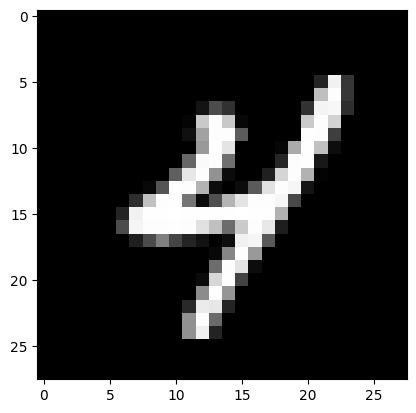

In [23]:
# get a test example
dataiter_test = iter(test_loader)
images_test, labels_test = next(dataiter_test)

# make a prediction
with torch.no_grad(): # Disable gradient calculations for inference
    output = model(images_test)

# get the predicted class for the first image in the batch
_, predicted = torch.max(output[0], 0)

print(f"Actual label: {labels_test[0].item()}")
print(f"Predicted label: {predicted.item()}")

# Display the test image
imshow(torchvision.utils.make_grid(images_test[0]))

Training set label distribution:
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64

Test set label distribution:
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
Name: count, dtype: int64


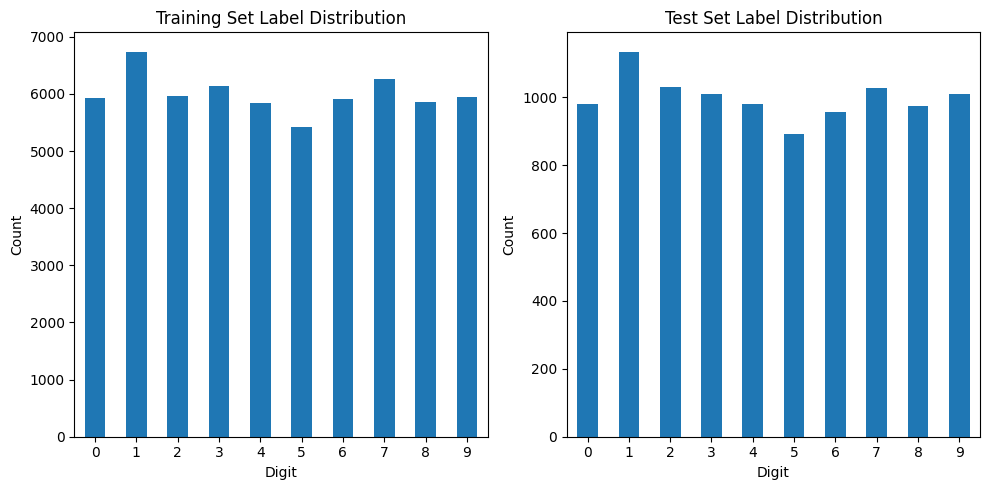

In [31]:
# show the distribution of labels in the training set
train_labels_list = [label for _, label in train_dataset]
train_label_counts = pd.Series(train_labels_list).value_counts().sort_index()
print("Training set label distribution:")
print(train_label_counts)

# show the distribution of labels in the test set
test_labels_list = [label for _, label in test_dataset]
test_label_counts = pd.Series(test_labels_list).value_counts().sort_index()
print("\nTest set label distribution:")
print(test_label_counts)

# Optional: Visualize the distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
train_label_counts.plot(kind='bar')
plt.title('Training Set Label Distribution')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
test_label_counts.plot(kind='bar')
plt.title('Test Set Label Distribution')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [27]:
# Evaluate on validation set
print("Evaluation on validation set:")
check_accuracy(val_loader, model)

Evaluation on validation set:
Got 4921 / 5000 with accuracy 98.42


In [15]:
# instantiate the model
# Assuming grayscale images (1 input channel) and 10 output classes (digits 0-9)
model = CNN(in_channels=1, num_classes=10)

In [21]:
# define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
app

# Task
Split the test set into a validation set and a test set, create dataloaders for both, and evaluate the trained model on the test set.

## Split test set

### Subtask:
Split the current `test_dataset` into a new validation set and a new test set.


**Reasoning**:
I need to split the existing test dataset into a validation set and a new test set. I will use `random_split` for this purpose and define the sizes based on a 50/50 split.



In [24]:
from torch.utils.data import random_split

# Define the size of the validation set (50% of original test set)
val_size = int(0.5 * len(test_dataset))

# Calculate the size of the new test set
test_size_new = len(test_dataset) - val_size

# Split the test_dataset into validation and new test sets
val_dataset, test_dataset_new = random_split(test_dataset, [val_size, test_size_new])

print(f"Original test set size: {len(test_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"New test set size: {len(test_dataset_new)}")

Original test set size: 10000
Validation set size: 5000
New test set size: 5000


## Create dataloaders

### Subtask:
Create `DataLoader` for the new validation and test sets.


**Reasoning**:
Create DataLoaders for the validation and the new test sets.



In [25]:
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader_new = DataLoader(dataset=test_dataset_new, batch_size=batch_size, shuffle=False)

## Evaluate on test set

### Subtask:
Write code to evaluate the trained model on the new test set and calculate the accuracy.


**Reasoning**:
Define the check_accuracy function to evaluate the model on a given data loader.



In [26]:
def check_accuracy(loader, model):
    # set the model to evaluation mode
    model.eval()

    # initialize variables to track correct predictions and total samples
    num_correct = 0
    num_samples = 0

    # disable gradient calculations for inference
    with torch.no_grad():
        # iterate through the data loader
        for x, y in loader:
            # move data and targets to the appropriate device (CPU or GPU)
            x = x.to("cuda" if torch.cuda.is_available() else "cpu")
            y = y.to("cuda" if torch.cuda.is_available() else "cpu")

            # pass data through the model to get predictions
            scores = model(x)

            # calculate the predicted class for each sample in the batch
            _, predictions = scores.max(1)

            # compare predictions with actual targets and update num_correct
            num_correct += (predictions == y).sum()

            # update num_samples
            num_samples += predictions.size(0)

        # calculate and print the accuracy
        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")

    # set the model back to training mode
    model.train()

# call the check_accuracy function with the new test loader and the trained model
check_accuracy(test_loader_new, model)

Got 4919 / 5000 with accuracy 98.38


## Summary:

### Data Analysis Key Findings

*   The original test set containing 10000 samples was successfully split into a new validation set and a new test set, each containing 5000 samples.
*   `DataLoader` objects were created for both the new validation and test sets with a specified batch size and shuffling disabled.
*   The trained model achieved an accuracy of 98.38% on the new test set, correctly predicting 4919 out of 5000 samples.

### Insights or Next Steps

*   The high accuracy on the new test set suggests the model generalizes well to unseen data.
*   Further evaluation on the validation set could be performed to monitor performance during potential future model retraining or hyperparameter tuning.
